<a href="https://colab.research.google.com/github/evanstjabadi/stock/blob/main/stock_lib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install stocker
!pip install yfinance
!pip install ipython-sql
!pip install sqlite3

  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=23b47f8e8496567b46e94e99853165f1a1136fcd72851bc7d0b0e53b213b78e9
  Stored in directory: /root/.cache/pip/wheels/fe/a0/79/b73d4a0c535b421b88fc7b393936b371fabbfeaf979eca4050
Successfully built yfinance
ERROR: yfinance 0.1.63 has requirement lxml>=4.5.1, but you'll have lxml 4.2.6 which is incompatible.
     |████████████████████████████████| 6.3MB 3.9MB/s 
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


[*********************100%***********************]  1 of 1 completed


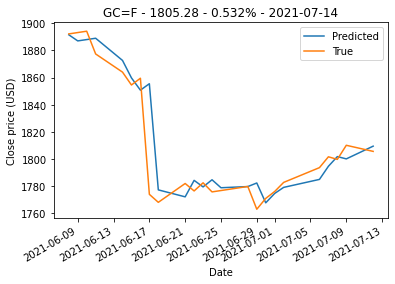

[1805.28, 0.532, '2021-07-14']

In [56]:
import stocker
pred = stocker.predict.tomorrow('GC=F', plot=True)
pred

In [57]:
import sqlite3
from datetime import datetime
import pytz


con = sqlite3.connect('/content/drive/MyDrive/Databases/stock.db')


In [58]:
mycursor = con.cursor()

a, b, c = pred[0], pred[1], pred[2] 
c = "'"+str(c)+"'" 
run_time = "'"+str(datetime.now(pytz.timezone('Africa/Johannesburg')))+"'" 
print(run_time) 
sql = "INSERT INTO Stock_pred (name, pred_close, error, pred_date, act_close, run_time) VALUES ({}, {}, {}, {}, {}, {})".format('"xauusd"', a,b,c,0, run_time) 
print(str(sql)) 

mycursor.execute(str(sql))

con.commit()

print(mycursor.rowcount, "record(s) inserted.")

'2021-07-14 01:30:23.136964+02:00'
INSERT INTO Stock_pred (name, pred_close, error, pred_date, act_close, run_time) VALUES ("xauusd", 1805.28, 0.532, '2021-07-14', 0, '2021-07-14 01:30:23.136964+02:00')
1 record(s) inserted.


In [59]:
mycursor.execute('SELECT * from Stock_pred')
for i in mycursor:
  print(i)

('xauusd', 1803.48, 0.544, '2021-07-14', 0.0, '2021-07-14 01:29:30.599590+02:00')
('xauusd', 1805.28, 0.532, '2021-07-14', 0.0, '2021-07-14 01:30:23.136964+02:00')


In [ ]:
import yfinance as yf
df = yf.download('GC=F', '2021-07-8', '2021-07-13', auto_adjust=True)
df

In [ ]:
import pytz
for tz in pytz.all_timezones:
    print(tz